# Time Series Operations

In [1]:
import pandas as pd

df = pd.read_csv('../meta/starbucks.csv', index_col='Date', parse_dates=['Date'])
print(df.shape)
df.head()

(1006, 2)


,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias"

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

In [2]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


**Custom Resampling Functions**

In [3]:
def last_day(entry):
    """
    Returns the last instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[-1]

In [4]:
df.resample(rule='A').apply(last_day)

,Close,Volume
Date,,
2015-12-31,56.7513,4960875
2016-12-31,53.2731,8344508
2017-12-31,56.1288,5365646
2018-12-31,64.4000,7690183


## Time Shifting
Sometimes you may need to shift all your data up or down along the time series index.

**`.shift()`** method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame

In [5]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [6]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


**Shifting based on Time Series Frequency Code**

We can choose to shift index values up or down without realigning the data by passing in a **freq** argument.<br>

In [7]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a **simple moving average**.

In [8]:
# 7 day rolling mean
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


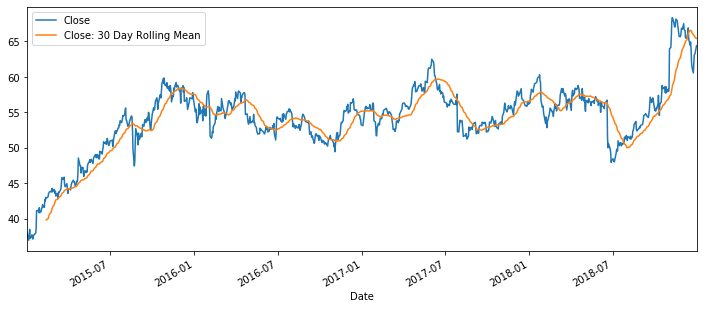

In [9]:
df['Close: 30 Day Rolling Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Rolling Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

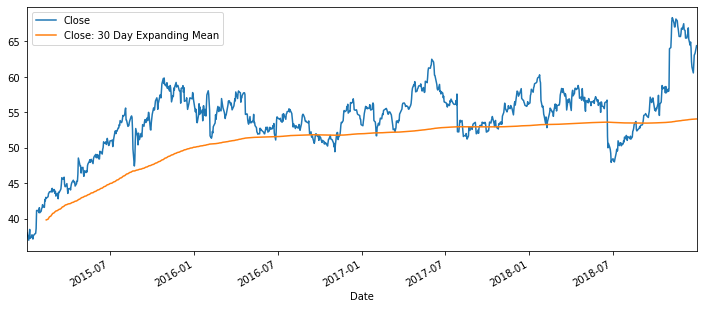

In [10]:
df['Close: 30 Day Expanding Mean'] = df['Close'].expanding(min_periods=30).mean()
df[['Close','Close: 30 Day Expanding Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);